In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import ut as ms
from ut.util.imports.ipython_utils import *
from ut.util.imports.data_analysis import *

import ut.pfile.accessor as pfile_accessor
import pandas as pd
import numpy as np
import os
from drug_lifecourse.data_flow import DrugLifeCourse
from drug_lifecourse.analysis import JointAnalysis
import ut.daf.ch as daf_ch
from ut.util.bugger import Bugger
import pdb

from ut.ppi.pot import Pot
from ut.ppi.pot import ProbPot

from ut.pfile.accessor import for_local

root_folder = os.path.abspath('.')
facc = for_local(os.path.join(root_folder, 'data'))

In [3]:
facc('')

'/D/Dropbox/dev/py/notebooks/misc/ODUS/data/'

In [4]:
ja = JointAnalysis('drug_use_and_social_binary_data')
ja.get_prob_pot();
rr = ja.get_relative_risk_df();
rr.head()

/D/Dropbox/dev/py/proj/misc/drug_lifecourse/data_flow.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['partner_or_spouse'] = any(df[['famrole_4', 'famrole_5']], axis=1).astype(int)
/D/Dropbox/dev/py/proj/misc/drug_lifecourse/data_flow.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[binmap['bin_name']][df[c].isin(binmap['ifin'])] = 1
/Users/thor/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

,exposure,event,relative_risk,non_exposure_count,exposure_count,log_relative_risk,relative_risk_percentage,"x, v","~x, v","x, ~v","~x, ~v"
0,prison,partner_or_spouse,0.891679,4247,599,-0.165403,-0.121479,206,1638.0,393.0,2609
1,prison,alc,1.504065,4247,599,0.588867,0.504065,486,2291.0,113.0,1956
2,crk,alc,1.608930,3917,929,0.686102,0.608930,767,2010.0,162.0,1907
3,mar,met,2.439495,2965,1881,1.286583,1.439495,260,168.0,1621.0,2797
4,prison,her,2.345370,4247,599,1.229815,1.345370,217,656.0,382.0,3591


In [12]:
for x in unique(rr['exposure']):
    print x

alc
amp
coc
crk
hal
her
mar
met
no_condom
parent
partner_or_spouse
prison
prp
sexint
tob


In [6]:
rr.to_excel(facc('stats_tables/relative_risk_table.xlsx'), index=False)

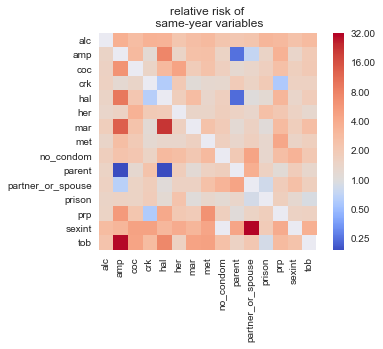

In [9]:
from misc.drug_lifecourse.scrap import plot_relrisk_matrix
plot_relrisk_matrix(rr);
title('relative risk of\n same-year variables')
grid('off');

In [23]:
rr.to_excel(facc('stats_tables/relative_risk_table.xlsx'))

In [24]:
t = ja.count_pot[ja.prob_pot.keys()[0]]
t

                          pval
partner_or_spouse prison      
0                 0       2609
                  1        393
1                 0       1638
                  1        206

In [12]:
tt = t / 'partner_or_spouse'
tt

                              pval
partner_or_spouse prison          
0                 0       0.869087
                  1       0.130913
1                 0       0.888286
                  1       0.111714

### Scrap (but useful)

In [26]:
dlc = DrugLifeCourse()

In [27]:
dlc.__dict__

{'col_order_01': ['id',
  'age',
  'alc',
  'tob',
  'mar',
  'hal',
  'prp',
  'coc',
  'crk',
  'her',
  'amp',
  'met',
  'year'],
 'data_dependencies': {'drug_use_and_social_binary_data': ['raw_life_course_data',
   'id_year_of_birth'],
  'drug_use_data': ['raw_life_course_data', 'id_year_of_birth'],
  'id_year_of_birth': ['raw_life_course_data'],
  'raw_life_course_data': ['yearly_csv_file']},
 'data_makers': {'drug_use_and_social_binary_data': <bound method DrugLifeCourse.drug_use_and_social_binary_data of <drug_lifecourse.data_flow.DrugLifeCourse object at 0x11ab98e90>>,
  'drug_use_data': <bound method DrugLifeCourse.drug_use_data of <drug_lifecourse.data_flow.DrugLifeCourse object at 0x11ab98e90>>,
  'id_year_of_birth': <function drug_lifecourse.data_flow.id_year_of_birth>,
  'raw_life_course_data': <function drug_lifecourse.data_flow.raw_life_course_data>},
 'data_storers': {'raw_hotel_data': <bound method DrugLifeCourse.put_in_store of <drug_lifecourse.data_flow.DrugLifeCour

In [28]:
dlc.data_dependencies

{'drug_use_and_social_binary_data': ['raw_life_course_data',
  'id_year_of_birth'],
 'drug_use_data': ['raw_life_course_data', 'id_year_of_birth'],
 'id_year_of_birth': ['raw_life_course_data'],
 'raw_life_course_data': ['yearly_csv_file']}

In [29]:
df = dlc.get_data('raw_life_course_data')
print "rows: %d" % len(df)
print "cols: %d" % len(df.columns)
print "unik ids: %d" % len(df['id'].unique())
# print "mean years: %d" % np.mean(df[['id']].groupby('id').count()['id'])

rows: 4846
cols: 302
unik ids: 92


In [30]:
len(df[['id']].groupby('id').count())

92

In [31]:
df = dlc.get_data('id_year_of_birth')
df.head()

,id,yob
0,1,1954
1,2,1948
2,3,1957
3,4,1953
4,5,1963


### Scrap

#### Get drug use data

In [32]:
df = dlc.get_data('drug_use_data')
df[20:25]

,id,age,alc,tob,mar,hal,prp,coc,crk,her,amp,met,year
20,1,20,0,1,1,1,0,0,0,0,1,0,1974
21,1,21,0,1,1,1,0,0,0,0,1,0,1975
22,1,22,0,1,1,1,0,0,0,1,1,0,1976
23,1,23,0,1,1,1,0,0,0,1,1,0,1977
24,1,24,1,1,1,1,0,0,0,1,0,0,1978


#### Visualizing Several Trajectories

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
#df = dlc.get_data('drug_use_data')

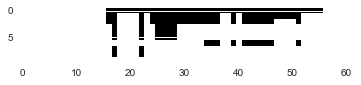

In [34]:
id = 2
arr = np.array(df[dlc.drugs][df['id'] == id]).transpose()
arr = np.mod(arr+1, 2)
plt.gray()
plt.imshow(arr, interpolation='none')
plt.grid(which='both', axis='x')

,id,age,alc,tob,mar,hal,prp,coc,crk,her,amp,met,year
0,1,0,0,0,0,0,0,0,0,0,0,0,1954
1,1,1,0,0,0,0,0,0,0,0,0,0,1955
2,1,2,0,0,0,0,0,0,0,0,0,0,1956
3,1,3,0,0,0,0,0,0,0,0,0,0,1957
4,1,4,0,0,0,0,0,0,0,0,0,0,1958


### Two variable Bayes

In [28]:
drug_1 = 'her'
drug_2 = 'crk'
d = df[[drug_1, drug_2]]
print len(d)
d.head()

4846


,her,crk
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [30]:
import ms_utils.ppi.pot as ppi_pot
count = ppi_pot.mk_count_pot(d)
count

AttributeError: 'module' object has no attribute 'mk_count_pot'

In [21]:
prob_hc = count / float(sum(count))
prob_hc

her  crk
0    0      0.686133
     1      0.133719
1    0      0.122163
     1      0.057986
Name: her, dtype: float64

In [29]:
t = count[count['crk']==1]
t

KeyError: 'crk'

### Drug Data Prob and relative risk Joins

In [285]:
import ms_utils as ms
from util.bugger import Bugger
#import pfile.accessor as pfile_accessor
import pandas as pd
import numpy as np
from misc.drug_lifecourse.data_flow import DrugLifeCourse
import ms_utils.daf.ch
import ms_utils.daf.get
import ms_utils.daf.to
import ms_utils.pplot.get
from ppi.pot import Pot
from ppi.pot import ProbPot


In [32]:
dlc = DrugLifeCourse()
data = dlc.get_data('drug_use_data')
data = daf.manip.reorder_columns_as(data,['id','age','year'])
data = data[data['age']>=16]
data.head()

,id,year,age,alc,tob,mar,hal,prp,coc,crk,her,amp,met
16,1,1970,16,0,1,0,0,0,0,0,0,0,0
17,1,1971,17,0,1,0,0,0,0,0,0,0,0
18,1,1972,18,0,1,1,0,0,0,0,0,0,0
19,1,1973,19,0,1,1,0,0,0,0,0,1,0
20,1,1974,20,0,1,1,1,0,0,0,0,1,0


In [34]:
drugs = data.columns[3:]
drugs

Index([u'alc', u'tob', u'mar', u'hal', u'prp', u'coc', u'crk', u'her', u'amp', u'met'], dtype='object')

In [104]:
# make count potentials for all pairs of drugs
n_drugs = len(drugs)
count_pot = dict()
for i in range(n_drugs-1):
    for j in range(i+1, n_drugs):
        count_pot = dict(count_pot, **{(drugs[i], drugs[j]): Pot.from_points_to_count(data[[drugs[i], drugs[j]]])})
        count_pot = dict(count_pot, **{(drugs[j], drugs[i]): Pot.from_points_to_count(data[[drugs[j], drugs[i]]])})
# display the first
count_pot['mar','crk']

         pval
mar crk      
0   0    1094
    1     536
1   0    1351
    1     393

In [235]:
np.exp2()

TypeError: return arrays must be of ArrayType

In [39]:
# make joint probability potentials for all pairs of drugs
n_drugs = len(drugs)
jprob_pot = {k:(v/[]) for (k, v) in count_pot.iteritems()}
jprob_pot['mar','crk']

             pval
mar crk          
0   0    0.324244
    1    0.158862
1   0    0.400415
    1    0.116479

In [41]:
n_drugs = len(drugs)
relrisk = [{'event': k[0], 
            'exposure': k[1], 
            'relative_risk': ProbPot(v.tb).relative_risk(k[0],k[1]).tb.pval[0]} 
           for k, v in jprob_pot.iteritems()]
relrisk = pd.DataFrame(relrisk)
relrisk['log_relative_risk'] = log2(relrisk['relative_risk'])
relrisk = relrisk[['exposure', 'event', 'relative_risk', 'log_relative_risk']]

numpy.ufunc

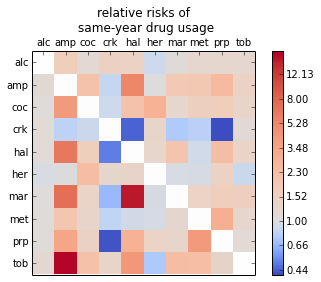

In [241]:
from misc.drug_lifecourse.scrap import plot_relrisk_matrix
plot_relrisk_matrix(relrisk)
title('relative risks of \n same-year drug usage\n')

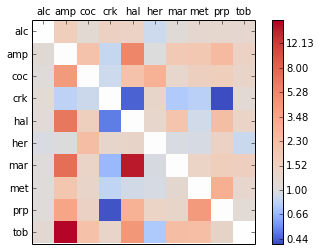

In [228]:
t = relrisk.copy()
matrix_shape = (t['exposure'].nunique(), t['event'].nunique())
m = ms.daf.to.map_vals_to_ints_inplace(t, cols_to_map=['exposure'])
m = m['exposure']
ms.daf.to.map_vals_to_ints_inplace(t, cols_to_map={'event': dict(zip(m, range(len(m))))})
RR = zeros(matrix_shape)
RR[t['exposure'], t['event']] = t['relative_risk']
RR[range(len(m)), range(len(m))] = nan

RRL = log2(RR)
def normalizor(X):
    min_x = nanmin(X)
    range_x = nanmax(X) - min_x
    return lambda x: (x - min_x) / range_x
normalize_this = normalizor(RRL)
center = normalize_this(0)

from ms_utils.pplot.color import shifted_color_map

color_map = shifted_color_map(cmap=cm.get_cmap('coolwarm'), 
                              start=0, midpoint=center, stop=1)
# imshow(RR, cmap=color_map, norm=matplotlib.colors.LogNorm(vmin=nanmin(RR), vmax=nanmax(RR)), interpolation='none');
imshow(RRL, cmap=color_map, interpolation='none');

xticks(range(shape(RRL)[0]), m)
yticks(range(shape(RRL)[1]), m)
gca().xaxis.tick_top()
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["%.02f" % x for x in 2 ** array(ms.pplot.get.get_colorbar_tick_labels_as_floats(cbar))])

In [152]:
r = relrisk.set_index(['exposure', 'event'])
print r.loc['mar', 'hal']['relative_risk']
print r.loc['hal', 'mar']['relative_risk']

15.9354931193
2.02856364379


### More variables

In [9]:
ja = JointAnalysis('drug_use_and_social_binary_data')

In [5]:
ja.get_prob_pot();

In [8]:
ja.prob_pot[('alc','amp')]

             pval
alc amp          
0   0    0.417870
    1    0.009080
1   0    0.527858
    1    0.045192

In [10]:
ja.get_relative_risk_df();

AttributeError: 'JointAnalysis' object has no attribute 'get_relative_risk_df'

In [24]:
from ms_utils.daf.diagnosis import diag_df
dlc = DrugLifeCourse()

TypeError: super(type, obj): obj must be an instance or subtype of type

In [28]:
d = dlc.get_data('raw_life_course_data')
diag_df(d).to_excel(facc('stats_tables/variable_diagnosis.xlsx'), index=False)

In [25]:
d = dlc.get_data('drug_use_and_social_binary_data')
analysis_vars = list(set(d).difference(['id', 'year', 'age']))
analysis_vars

['mar',
 'parent',
 'prison',
 'alc',
 'met',
 'prp',
 'amp',
 'partner_or_spouse',
 'hal',
 'her',
 'no_condom',
 'coc',
 'sexint',
 'tob',
 'crk']

In [26]:
n_vars = len(analysis_vars)
count_pot = dict()
for i in range(n_vars-1):
    for j in range(i+1, n_vars):
        count_pot = dict(count_pot, **{(analysis_vars[i], analysis_vars[j]): Pot.from_points_to_count(d[[analysis_vars[i], analysis_vars[j]]])})
        count_pot = dict(count_pot, **{(analysis_vars[j], analysis_vars[i]): Pot.from_points_to_count(d[[analysis_vars[j], analysis_vars[i]]])})
jprob_pot = {k:(v/[]) for (k, v) in count_pot.iteritems()}
# display the first
jprob_pot[jprob_pot.keys()[0]]

                              pval
partner_or_spouse prison          
0                 0       0.538382
                  1       0.081098
1                 0       0.338011
                  1       0.042509

In [71]:
jprob_pot = {k:(v/[]) for (k, v) in count_pot.iteritems()}
n_vars = len(analysis_vars)
relrisk = list()
for k, v in jprob_pot.iteritems():
    relrisk_val = ProbPot(v.tb).relative_risk(k[0],k[1]).tb.pval
    if len(relrisk_val) >= 1:
        relrisk_val = relrisk_val[0]
    else:
        relrisk_val = nan
    relrisk.append({'event': k[0], 'exposure': k[1], 'relative_risk': relrisk_val})
relrisk = pd.DataFrame(relrisk)
relrisk['log_relative_risk'] = log2(relrisk['relative_risk'])
relrisk = relrisk[['exposure', 'event', 'relative_risk', 'log_relative_risk']]

,exposure,event,relative_risk,log_relative_risk
0,prison,partner_or_spouse,0.891679,-0.165403
1,prison,alc,1.504065,0.588867
2,crk,alc,1.608930,0.686102
3,mar,met,2.439495,1.286583
4,prison,her,2.345370,1.229815


In [13]:
from collections import Counter
Counter(any(d[['famrole_4', 'famrole_5']], axis=1))

Counter({False: 3002, True: 1844})

In [293]:
[1,2] + [4,5,6]

[1, 2, 4, 5, 6]

In [253]:
d['prison'].unique()

array([0, 1])

In [268]:
from ms_utils.daf.diagnosis import diag_df

In [269]:
diag_df(d)

,column,first_value,num_nonnan,num_nonzero,num_uniques,type
0,id.date,9/8/2009,4846,4846,121,str
1,id,1,4846,4846,92,int64
2,year,1954,4846,4846,67,int64
3,druguse_1,0,4846,2777,2,int64
4,druguse_2,0,4846,2499,2,int64
5,druguse_3,0,4846,1881,2,int64
6,druguse_4,0,4846,400,2,int64
7,druguse_5,0,4846,817,2,int64
8,druguse_6,0,4846,1214,2,int64
9,druguse_7,0,4846,929,2,int64


In [264]:
dlc.__dict__.keys()

['col_order_01',
 'verbose_level',
 'drugs',
 'facc',
 'data_storers',
 'data_makers',
 'data_dependencies',
 'yearly_csv_file',
 'store',
 'variable_map']

In [265]:
dlc.store

<class 'util.pstore.MyStore'>
File path: /D/Dropbox/dev/py/data/socio/drug_lifecourse/lifecourse.h5
Empty

In [260]:
ls /D/Dropbox/dev/py/data/socio/drug_lifecourse/

ODUS_Demo_30 Day.csv          ODUS_Demo_30 Day_summary.pdf  ODUS_Yearly_labels.dat
ODUS_Demo_30 Day.dat          ODUS_Yearly.csv               ODUS_Yearly_summary.pdf
ODUS_Demo_30 Day.sav          ODUS_Yearly.dat               lifecourse.h5
ODUS_Demo_30 Day_labels.csv   ODUS_Yearly.sav
ODUS_Demo_30 Day_labels.dat   ODUS_Yearly_labels.csv


In [282]:
d['prison'].unique()

[autoreload of misc.drug_lifecourse.data_flow failed: Traceback (most recent call last):
  File "/Users/thor/anaconda/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name binarization_map
]


array([0, 1])

In [283]:
t = d[d['sexint'].isin([4])]

In [284]:
d['sexint'].unique()

array([0, 1])